In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from utils import *

DATA_PATH = '../../data/esp/'

%load_ext autoreload
%autoreload 2

# Análisis de Melisa con BOW

En estas notas vamos a inspeccionar el dataset MeLiSA para ver si se pueden hacer representaciones de bolsa de palabras con este dataset.

In [2]:
df = load_data(DATA_PATH,'train',nclasses=3).loc[:,['review_content','review_rate']]
df.head(5)

Dataset cargado para 3 clases (malo=0, medio=1, bueno=2)
Num samples per category:
0    184750
1     92375
2    184750
Name: review_rate, dtype: int64


,review_content,review_rate
0,"Medio berreta, no justifica el gasto, ya se sa...",0
1,Quizás a unas personas les sirve y a otras no ...,1
2,Excelente !! superó mi expectativas. Lo único ...,2
3,Es una buena relación calidad/precio. La cámar...,2
4,"Muy poca voluntad para ayudarme con cambiarlo,...",0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

def word_vectorize_bow(ds,token_pattern,ngram_range,max_df,min_df,max_features,vocab):
    vec = CountVectorizer(input='content',encoding='utf-8',decode_error='strict',strip_accents=None,
              lowercase=True,preprocessor=None,tokenizer=None,stop_words=None,token_pattern=token_pattern,
              ngram_range=(1,1),analyzer='word',max_df=max_df,min_df=min_df,max_features=max_features,
              vocabulary=vocab,binary=False,dtype=float)
    X = vec.fit_transform(ds)
    return X, vec.vocabulary_
        

X, vocab = word_vectorize_bow(df['review_content'],token_pattern=r'(\w+|[\.,;:"\'!¡\?¿])',
                ngram_range=(1,1),max_df=1.0,min_df=1,max_features=10000,vocab=None)
X

<461875x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 13336329 stored elements in Compressed Sparse Row format>

In [25]:
from scipy.sparse import csr_matrix
Xs = csr_matrix(np.array([[10, 10, 10, 10],
                          [10, 10, 10,  0],
                          [10, 10,  0,  0],
                          [ 0,  0,  0,  1],
                          [ 1,  1,  0,  2]],dtype=float).T)

vsm.pmi(Xs).maximum(0)
#vsm.pmi(Xs).toarray()
#tfidf(Xs).toarray()

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [13]:
from scipy.sparse import csr_matrix

X = np.array([[10, 10, 10, 10],
              [10, 10, 10,  0],
              [10, 10,  0,  0],
              [ 0,  0,  0,  1]],dtype=float)

X = csr_matrix(X)
Xtfidf = vsm.tfidf(X.T)
Xtfidf.toarray()

Xpmi = vsm.ppmi(X)
Xpmi.toarray()

array([[0.        , 0.        , 0.12883287, 0.72666987],
       [0.01104984, 0.01104984, 0.41651494, 0.        ],
       [0.41651494, 0.41651494, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.11296423]])

<IPython.core.display.Javascript object>


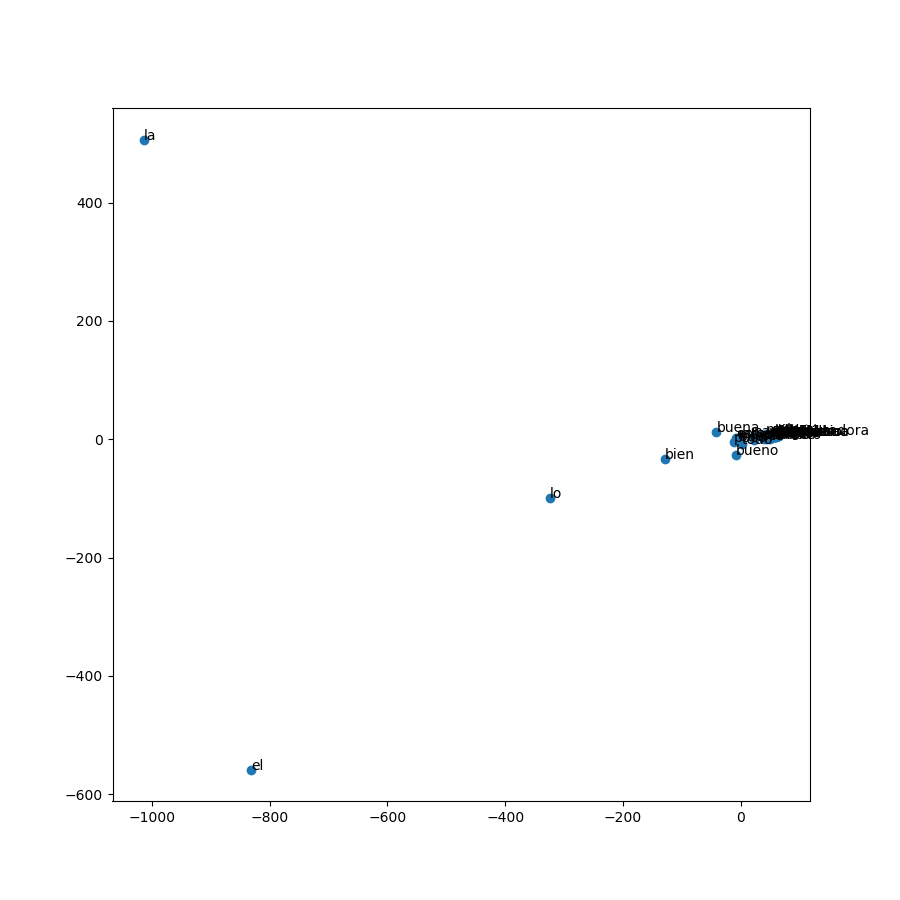

In [4]:
words = 'bueno malo buena mala buen bien mal malísimo buenísimo malisima buenísima perfecto excelente terrible'.split(' ') + \
        'mucho poco mucha poca lindo linda feo fea nada todo barato caro'.split(' ') + \
        'azul verde rojo amarillo celeste blanco negro'.split(' ') + \
        'silla mueble escritorio mesa computadora celular'.split(' ') + \
        'el él ella la lo ese esa esta esto este estos estas mujer hombre género'.split(' ')

fig, ax = vsm.pca_viz(X.T,vocab,words)

<IPython.core.display.Javascript object>


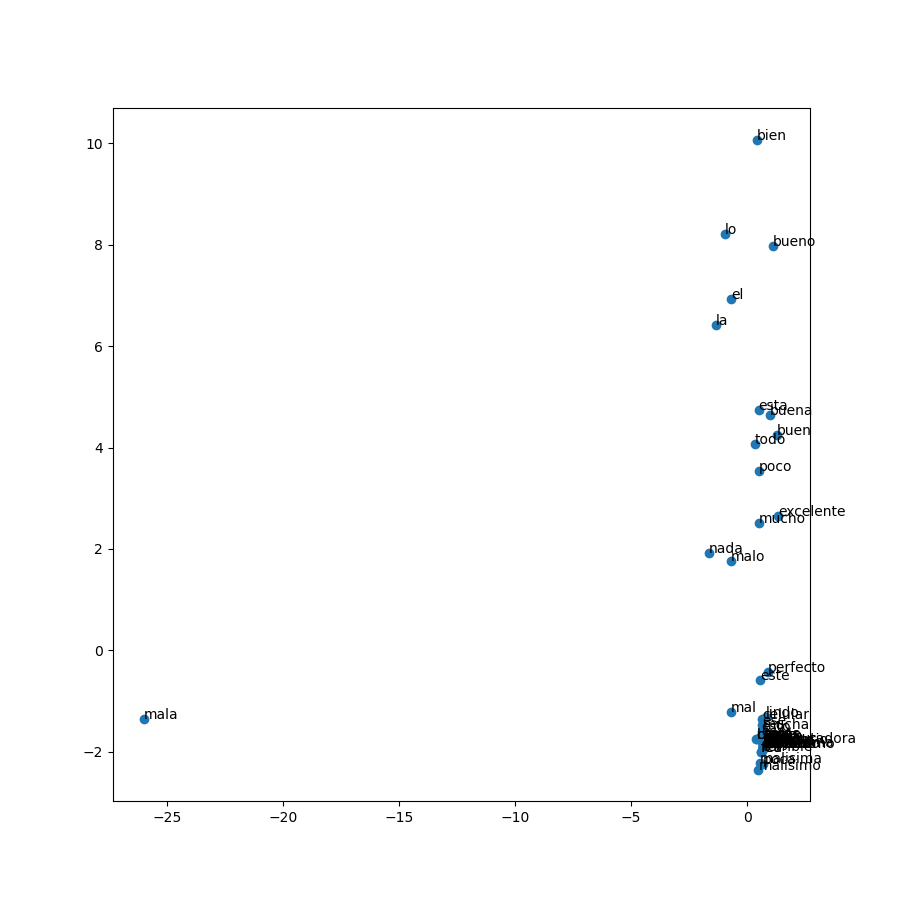

In [19]:
X_tfidf = vsm.tfidf(X)
fig, ax = vsm.pca_viz(X_tfidf.T,vocab,words)

<IPython.core.display.Javascript object>


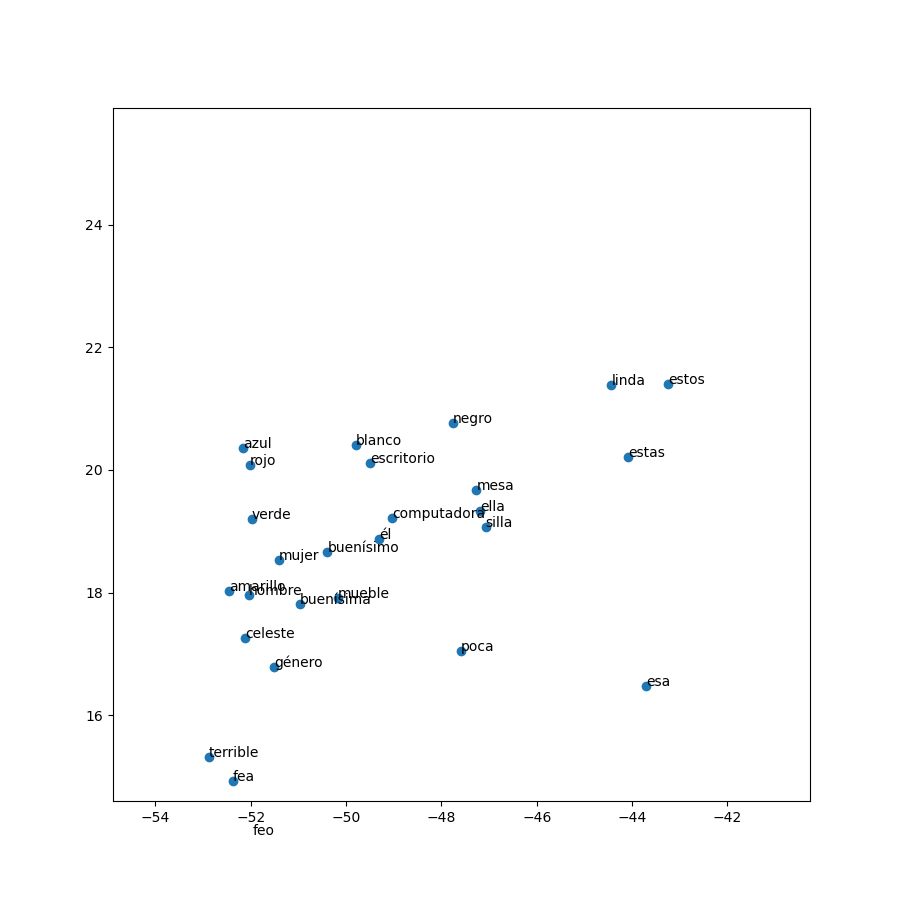

In [5]:
X_pmi = vsm.ppmi(X)
fig, ax = vsm.pca_viz(X_pmi.T,vocab,words)